<a href="https://colab.research.google.com/github/AIKevin/machine_learning_with_python/blob/master/practical_work1_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple Linear Regression
##PW1
###Sci-Kit Learn



##Introduction

**Simple linear regression** is a very straightforward approach for predicting a quantitative response Y on the basis of a single predictor variable X. It assumes that there is approximately a linear relationship between X and Y. Mathematically, we can write this linear relationship as

*Y=β0+β1X+ϵ*

*Y≈β0+β1X*

where β0 and β1 are two unknown constants that represent the intercept and slope, also known as coefficients or parameters, and ϵ is the error term.

Given some estimates  
^β0
  and  ^β1
  for the model coefficients, we predict future inputs x using

*ˆy= ^β0+ ^β1x*

where  
ˆy
  indicates a prediction of Y on the basis of X=x. The hat symbol,  ^
 , denotes an estimated value.

##Table of Contents


1.   Installing Dependencies
2.   Data Loading, Preprocessing and Visualisization
3.   Linear Regression on the EU dataset
4.   Linear Regression on the Boston dataset



##1.Installing dependencies

Matplotlib is a library allowing us to make plots of data

Pandas is a library allowing us to use dataframe, very convenient to manipulate datasets

Numpy is a library allowing us to manipulate arrays, convenient to apply operations on matrix of data


In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

rpy2 is a library allowing us to handle RData files and import it into python

In [0]:
from rpy2.robjects import r
import rpy2.robjects.pandas2ri as pandas2ri

## 2.Data Loading ,Preprocessing and Visualization

###Data Loading

We download the dataset online. No need to have it in local.

We are going to employ the EU dataset. The EU dataset contains 28 rows with the member states of the European Union (Country), the number of seats assigned under different years (Seats2011, Seats2014), the Cambridge Compromise apportionment (CamCom2011), and the countries population (Population2010,Population2013).

In [3]:
!wget -O EU.RData http://www.mghassany.com/MLcourse/datasets/EU.RData


EU=r.load("EU.RData")
EU=pandas2ri.ri2py_dataframe(r['EU'])

--2019-09-09 19:00:53--  http://www.mghassany.com/MLcourse/datasets/EU.RData
Resolving www.mghassany.com (www.mghassany.com)... 185.199.111.153, 185.199.109.153, 185.199.110.153, ...
Connecting to www.mghassany.com (www.mghassany.com)|185.199.111.153|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.mghassany.com/MLcourse/datasets/EU.RData [following]
--2019-09-09 19:00:54--  https://www.mghassany.com/MLcourse/datasets/EU.RData
Connecting to www.mghassany.com (www.mghassany.com)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50903 (50K) [application/octet-stream]
Saving to: ‘EU.RData’

EU.RData            100%[===================>]  49.71K  --.-KB/s    in 0.03s   

2019-09-09 19:00:54 (1.93 MB/s) - ‘EU.RData’ saved [50903/50903]



/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


###Data Preprocessing
We must drop one line because it is a NaN that has been translated into a very big negative value that can modify our analysis.

In [0]:
EU=EU.drop(20)

###Dataset Dimension and Visualization

Let's explore the dataset




In [5]:
print("HEAD")
print(EU.head(28))
print("SHAPE")
print(EU.shape)
print("Column Names")
print(EU.columns)

HEAD
    Population2010  Seats2011  CamCom2011  Population2013  Seats2014
0         81802257         99          96        80523746         96
1         64714074         74          85        65633194         74
2         62008048         73          81        63896071         73
3         60340328         73          79        59685227         73
4         45989016         54          62        46704308         54
5         38167329         51          52        38533299         51
6         21462186         33          32        20020074         32
7         16574989         26          26        16779575         26
8         11305118         22          19        11161642         21
9         10839905         22          19        11062508         21
10        10637713         22          18        10516125         21
11        10506813         22          18        10487289         21
12        10014324         22          18         9908798         21
13         9340682         20

Some basic stats about the Dataset

In [6]:
EU.describe()

,Population2010,Seats2011,CamCom2011,Population2013,Seats2014
count,2.700000e+01,27.000000,27.000000,2.700000e+01,27.000000
mean,1.855939e+07,27.925926,27.814815,1.857182e+07,27.407407
std,2.344224e+07,25.381589,27.737835,2.352210e+07,25.210284
min,4.129700e+05,6.000000,6.000000,4.213640e+05,6.000000
25%,3.898446e+06,12.000000,10.500000,3.781496e+06,11.000000
50%,9.340682e+06,20.000000,17.000000,9.555893e+06,20.000000
75%,1.901859e+07,29.500000,29.000000,1.839982e+07,29.000000
max,8.180226e+07,99.000000,96.000000,8.052375e+07,96.000000


Let's take only two columns.

In [7]:
cdf = EU[['Seats2011','Population2010']]
cdf.head(9)

,Seats2011,Population2010
0,99,81802257
1,74,64714074
2,73,62008048
3,73,60340328
4,54,45989016
5,51,38167329
6,33,21462186
7,26,16574989
8,22,11305118


##3.Linear Regression on the EU dataset
We need to import the linear model to perform it on our dataset.

In [8]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray( EU[['Population2010']])
train_y = np.asanyarray( EU[['Seats2011']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[1.07848587e-06]]
Intercept:  [7.90989023]


OK now let's load a bigger dataset.

##4.Linear Regression on the Boston dataset

###4.1 Dataset

Boston dataset is already loadable from a python library.

In [0]:
from sklearn.datasets import load_boston

In [0]:
dataset= load_boston()

In [11]:
print(dataset.data.shape)
print(dataset.feature_names)
print(dataset.target)
print(type(dataset))

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 

We need to convert it into a pandas dataframe to manipulate the data and make our model.

We split the dataset randomly in a 80/20 proportion.

In [12]:
boston=pd.DataFrame(dataset.data, columns=dataset.feature_names)
boston["MEDV"]=dataset.target
msk = np.random.rand(len(boston)) < 0.8
train = boston[msk]
test = boston[~msk]
print(type(boston))

<class 'pandas.core.frame.DataFrame'>


boston is now a dataframe, let's explore it a little bit

In [13]:
print(boston.head)
print(boston.columns)

<bound method NDFrame.head of          CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0     0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1     0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2     0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3     0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4     0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33  36.2
5     0.02985   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.12   5.21  28.7
6     0.08829  12.5   7.87   0.0  0.524  ...  311.0     15.2  395.60  12.43  22.9
7     0.14455  12.5   7.87   0.0  0.524  ...  311.0     15.2  396.90  19.15  27.1
8     0.21124  12.5   7.87   0.0  0.524  ...  311.0     15.2  386.63  29.93  16.5
9     0.17004  12.5   7.87   0.0  0.524  ...  311.0     15.2  386.71  17.10  18.9
10    0.22489  12.5   7.87   0.0  0.524  ...  311.0     15.2  392.52

Let's see a scatter plot of two variables

**Check for Linearity**

In order to perfom linear regression in R, we will use the function linear_model.LinearRegression() to fit a simple linear regression with medv as the response (dependent variable) and lstat as the predictor or independent variable, and then save it in model.

But before we run our model, let’s visually check if the relationship between x and y is linear.

Text(0, 0.5, 'MEDV')

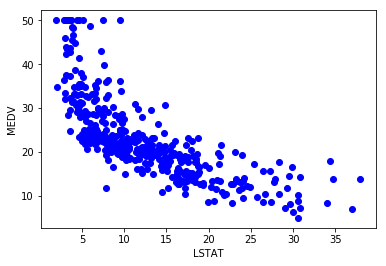

In [14]:
plt.scatter(train[["LSTAT"]], train[["MEDV"]],  color='blue')
plt.xlabel("LSTAT")
plt.ylabel("MEDV")

Let's apply a logarithm on Lstat to have a linear relationship

Text(0, 0.5, 'MEDV')

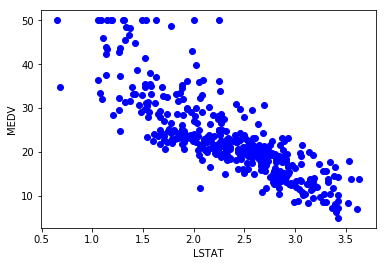

In [15]:
plt.scatter(np.log(train[["LSTAT"]]), train[["MEDV"]],  color='blue')
plt.xlabel("LSTAT")
plt.ylabel("MEDV")

Great. Now let's apply a linear regression.

###4.2 Regression

In [16]:
regr2 = linear_model.LinearRegression()
train_x = np.asanyarray(np.log(train[["LSTAT"]]))
train_y = np.asanyarray(train[["MEDV"]])
regr2.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr2.coef_)
print ('Intercept: ',regr2.intercept_)

Coefficients:  [[-12.5765353]]
Intercept:  [52.43683298]


Let's plot the data with the regression line.

Text(0, 0.5, 'MEDV')

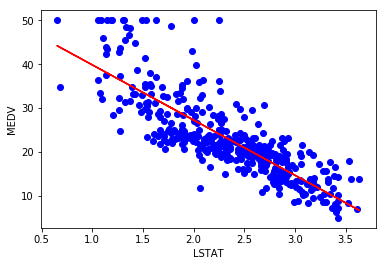

In [17]:
plt.scatter(np.log(train[["LSTAT"]]), train[["MEDV"]],  color='blue')
plt.plot(train_x, regr2.coef_[0][0]*train_x + regr2.intercept_[0], '-r')
plt.xlabel("LSTAT")
plt.ylabel("MEDV")

### 4.3 Prediction
We can now make some predictions. Note that we still need to apply our log function on the data we want to predict.

In [18]:
regr2.predict(np.log([[5],[10],[15]]))

array([[32.19568025],
       [23.47829027],
       [18.37894402]])

### 4.4 Evaluation
OK now let's apply on our test set.

Let's calculate the MSE and the R2.

In [19]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(np.log(test[["LSTAT"]]))
test_y = np.asanyarray(test[["MEDV"]])
y_hat = regr2.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 3.67
Residual sum of squares (MSE): 27.19
R2-score: 0.47


We can even plot the real and predicted data to compare if we want.

In [20]:
print(test[["LSTAT"]])
print(test[["MEDV"]])
print(test_y)
print(regr2.predict(test_x))

     LSTAT
4     5.33
7    19.15
10   20.45
11   13.27
23   19.88
28   12.80
31   13.04
41    4.84
43    7.44
50   13.45
69    8.79
79    9.10
83    7.51
85    6.53
93    6.21
96   11.34
112  16.21
113  17.09
115  15.76
120  14.37
121  14.27
127  17.19
136  16.90
141  34.41
142  26.82
149  21.45
161   1.73
171  12.03
172  14.69
176  10.11
..     ...
403  19.77
405  22.98
406  23.34
408  26.40
409  19.78
416  25.79
425  24.39
426  15.69
431  19.69
436  18.05
444  23.79
446  17.79
452  17.27
461  14.65
465  14.13
470  16.29
471  12.87
472  14.36
478  18.03
479  13.11
480  10.74
482   7.01
486  14.98
489  23.97
493  12.01
494  13.59
499  15.10
502   9.08
503   5.64
504   6.48

[96 rows x 1 columns]
     MEDV
4    36.2
7    27.1
10   15.0
11   18.9
23   14.5
28   18.4
31   14.5
41   26.6
43   24.7
50   19.7
69   20.9
79   20.3
83   22.9
85   26.6
93   25.0
96   21.4
112  18.8
113  18.7
115  18.3
120  22.0
121  20.3
127  16.2
136  17.4
141  14.4
142  13.4
149  15.4
161  50.0
171  19.1
172  